https://liz09045.tistory.com/94

In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
df = load_iris()
flower_data = df['data'] # = df.data
flower_target = df['target'] # = df.target

In [63]:
flower_data.shape
iris_df = pd.DataFrame(data=df.data, columns=df.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
print('#1 iris target 값\n',flower_target)
print('#2 iris target 명\n',df.target_names)

#1 iris target 값
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
#2 iris target 명
 ['setosa' 'versicolor' 'virginica']


(150,)
(117,)


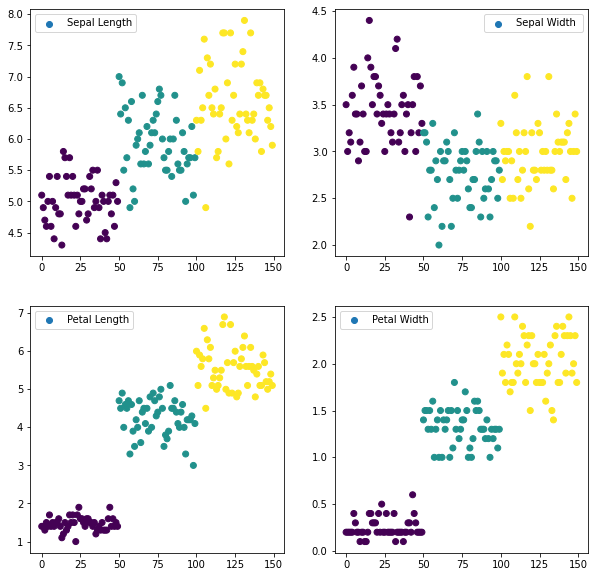

In [65]:
import matplotlib.pyplot as plt
print(total_idx.shape)
print(flower_data[train_idx][:,0].shape)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(total_idx, flower_data[:,0], c=flower_target, label="Sepal Length")
plt.legend()
plt.subplot(2,2,2)
plt.scatter(total_idx, flower_data[:,1], c=flower_target, label="Sepal Width ")
plt.legend()
plt.subplot(2,2,3)
plt.scatter(total_idx, flower_data[:,2], c=flower_target, label="Petal Length")
plt.legend()
plt.subplot(2,2,4)
plt.scatter(total_idx, flower_data[:,3], c=flower_target, label="Petal Width")
plt.legend()

# Sklearn 사용

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flower_data, flower_target, test_size=37, random_state=13)
print('x_train =',x_train.shape,'x_test =',x_test.shape, 'y_train =', y_train.shape, 'y_test =', y_test.shape)

x_train = (113, 4) x_test = (37, 4) y_train = (113,) y_test = (37,)


DecisionTreeClassifier

In [67]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=13)
# 학습 수행
dt_clf.fit(x_train, y_train)
# 테스트 데이터로 예측
pred = dt_clf.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

print(f'Accruracy : {accuracy_score(y_test, pred):.2f}')

Accruracy : 0.95


SVM (Support Vector Machine)

In [69]:
from sklearn.svm import SVC
svc = SVC(kernel ='rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
y_svc_pred=svc.predict(x_test)
print("pred", y_svc_pred)

svc_acc = accuracy_score(y_test, y_svc_pred)
print(f'Accuracy: {svc_acc:2f}')

pred [1 1 0 2 2 0 2 2 0 1 1 2 1 0 2 0 2 2 1 0 1 0 0 2 1 2 0 2 1 2 2 0 0 2 2 1 0]
Accuracy: 0.972973


Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_lrc_pred=lrc.predict(x_test)
print("pred", y_lrc_pred)

lrc_acc = accuracy_score(y_test, y_lrc_pred)
print(f'Accuracy: {lrc_acc:.2f}')

pred [1 1 0 2 2 0 2 2 0 1 2 1 1 0 2 0 2 2 1 0 1 0 0 2 1 2 0 2 1 2 2 0 0 2 2 1 0]
Accuracy: 0.97


KNN model

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [76]:
y_knn_pred=knn.predict(x_test)
print(f'pred = {y_knn_pred}')
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f'Accuracy: {knn_acc:.2f}')

pred = [1 1 0 2 2 0 2 1 0 1 2 1 1 0 2 0 2 2 1 0 1 0 0 2 1 2 0 2 1 2 2 0 0 2 2 1 0]
Accuracy: 0.95
